In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import random as rn
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math as math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [69]:
data = pd.read_csv('Base_Data.csv')
data = data.drop(columns=['Unnamed: 0'])
data['log_Price'] = np.log(data.SalePrice)

In [70]:
f_reg_cont = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath',
 'HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

In [72]:
chi_sq_var = ['MSSubClass', 'Utilities', 'LandSlope', 'ExterCond', 'MiscFeature', 'Street']

In [73]:
anova_t_var = ['PavedDrive_P','BsmtExposure_Not_Avail','LotConfig_CulDSac','LandContour_Bnk','MasVnrType_BrkFace','Foundation_PConc',
 'LotShape_IR2','GarageQual_Fa','GarageFinish_RFn','BsmtFinType2_Not_Avail','Functional_Maj2',
 'ExterQual_TA','SaleType_New','ExterCond_Fa','CentralAir_N','RoofMatl_WdShngl',
 'BldgType_TwnhsE','RoofStyle_Gable','KitchenQual_TA','HeatingQC_Fa','Electrical_FuseF','Alley_Grvl','MiscFeature_Not_Avail']

In [74]:
test = data.iloc[:,:-3]
test = pd.get_dummies(test)

In [75]:
len(anova_t_var)

23

(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 156., 142., 102., 100.,  68.,  52.,  44.,
         22.,  24.,  12.,   4.,   3.,   3.,   1.,   2.]),
 array([10.46024211, 10.56271647, 10.66519084, 10.7676652 , 10.87013956,
        10.97261393, 11.07508829, 11.17756266, 11.28003702, 11.38251138,
        11.48498575, 11.58746011, 11.68993448, 11.79240884, 11.8948832 ,
        11.99735757, 12.09983193, 12.2023063 , 12.30478066, 12.40725502,
        12.50972939, 12.61220375, 12.71467812, 12.81715248, 12.91962684,
        13.02210121, 13.12457557, 13.22704994, 13.3295243 , 13.43199866,
        13.53447303]),
 <a list of 30 Patch objects>)

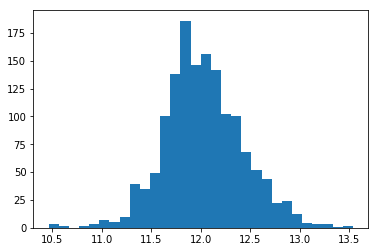

In [76]:
plt.hist(data['log_Price'],bins = 30)

lambda = -0.076924


(array([  3.,   2.,   0.,   0.,   4.,   6.,   5.,   4.,  19.,  36.,  33.,
         60., 102., 136., 188., 141., 172., 131.,  96.,  96.,  78.,  42.,
         47.,  22.,  18.,   9.,   2.,   4.,   2.,   2.]),
 array([7.18570046, 7.22651578, 7.2673311 , 7.30814641, 7.34896173,
        7.38977705, 7.43059237, 7.47140768, 7.512223  , 7.55303832,
        7.59385363, 7.63466895, 7.67548427, 7.71629959, 7.7571149 ,
        7.79793022, 7.83874554, 7.87956086, 7.92037617, 7.96119149,
        8.00200681, 8.04282212, 8.08363744, 8.12445276, 8.16526808,
        8.20608339, 8.24689871, 8.28771403, 8.32852934, 8.36934466,
        8.41015998]),
 <a list of 30 Patch objects>)

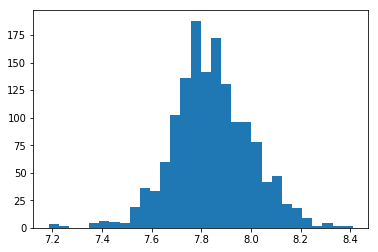

In [77]:
xt, maxlog, interval = stats.boxcox(data['SalePrice'], alpha=0.05)
print("lambda = {:g}".format(maxlog))
plt.hist(xt,bins = 30)

In [78]:
data['BC_Price'] = xt
prices = list(['SalePrice','log_Price','BC_Price'])

In [79]:
#data set for chisq and f_Reg
all_f_chi = f_reg_cont + chi_sq_var
data_f_chi = data[all_f_chi]
data_f_chi = pd.get_dummies(data_f_chi)

In [80]:
#data set for anova t test and f_Reg
dumm_data = pd.get_dummies(data)
all_f_anova = f_reg_cont + anova_t_var
data_f_anova = dumm_data[all_f_anova]

In [81]:
n_alphas = 500
alphas1 = np.logspace(-3, 3, n_alphas)

In [171]:
import statsmodels.api as sm
data_f_anova.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PavedDrive_P', 'BsmtExposure_Not_Avail',
       'LotConfig_CulDSac', 'LandContour_Bnk', 'MasVnrType_BrkFace',
       'Foundation_PConc', 'LotShape_IR2', 'GarageQual_Fa', 'GarageFinish_RFn',
       'BsmtFinType2_Not_Avail', 'Functional_Maj2', 'ExterQual_TA',
       'SaleType_New', 'ExterCond_Fa', 'CentralAir_N', 'RoofMatl_WdShngl',
       'BldgType_TwnhsE', 'RoofStyle_Gable', 'KitchenQual_TA', 'HeatingQC_Fa',
       'Electrical_FuseF', 'Alley_Grvl', 'MiscFeature_Not_Avail'],
      dtype='object')

In [183]:
data_ = data_f_chi
y = np.array(data['SalePrice'])
X = np.array(data_)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.7789269691893997

Text(0,0.5,'weights')

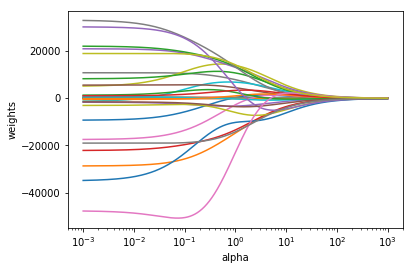

In [184]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

ridge = Ridge(normalize=True)
coefs = []
for a in alphas1:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas1, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


In [185]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ridgecv = RidgeCV(alphas=alphas1, scoring=None, normalize=True)
ridgecv.fit(X_train, y_train)
coefs1 = pd.Series(ridgecv.coef_, index=data_.columns)
alpha_ =  ridgecv.alpha_
score_ = ridgecv.score(X_train,y_train)
score_
ridgecv.score(X_test,y_test)

0.6141665940385772

In [186]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lassocv = LassoCV(alphas=alphas1, normalize=True,cv=5)
lassocv.fit(X_train, y_train)
lassocv.alpha_
coefs1 = pd.Series(lassocv.coef_, index=data_.columns)
alpha_ =  lassocv.alpha_
score_ = lassocv.score(X_train,y_train)
score_

0.8128725838433478

In [189]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print(rmse(ridgecv.predict(X_test),y_test))
#chi RMSE sq 0.1763
#anova RMSE sq 0.1762
print(rmse(lassocv.predict(X_test),y_test))
#both of 0.197
import math

51618.86876588894
51558.3176590906


In [138]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [139]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
y_pred = XGB.predict(X_test)
predictions = [round(value) for value in y_pred]

In [141]:
print(rmse(y_pred,y_test))

0.15246942820300882


In [143]:
XGB.score(X_test,y_test)

0.8464534292309438

In [99]:
xgb = XGBRegressor(nthread=-1)

In [100]:
params = {'gamma': [0.1], 'max_depth': [8], 'n_estimators': [150]}

In [101]:
XGB = XGBRegressor()
xgb = XGBRegressor(nthread=-1)
grid = GridSearchCV(xgb, params,cv=5)
grid.fit(X_train, y_train)
grid.score(X_train,y_train)

0.9541754552638522

In [102]:
grid.score(X_test,y_test)

0.8667727712714465

In [103]:
y_pred = grid.predict(X_test)
print(rmse(y_pred,y_test))

0.14202317192766625


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
param_grid = {
    'max_depth': [103],
    'max_features': [95],
    'n_estimators': [290],
}

In [150]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, params,cv=5)

In [147]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [151]:
grid_search.fit(X_train,y_train)

ValueError: Invalid parameter gamma for estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [110]:
grid_search.best_score_
grid_search.best_params_
grid_search.score(X,y)

0.9635690004812333

In [111]:
grid_search.score(X_test,y_test)

0.8796853691687467

In [112]:
y_pred = grid_search.predict(X_test)
print(rmse(y_pred,y_test))

0.1349652402821126


In [36]:
from sklearn.svm import SVR

In [37]:
svr = GridSearchCV(SVR(kernel='rbf'), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5),
                               "epsilon": [0.01,0.05,0.1,0.5]},
                              verbose = 3)

In [ ]:
svr.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, epsilon=0.01, gamma=0.01, score=0.004927241744061672, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  C=1.0, epsilon=0.01, gamma=0.01, score=0.0029825806479891748, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  C=1.0, epsilon=0.01, gamma=0.01, score=-0.00021187500706099094, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................
[CV]  C=1.0, epsilon=0.01, gamma=0.01, score=0.003461162904678017, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................
[CV]  C=1.0, epsilon=0.01, gamma=0.01, score=-0.020200880712589298, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................
[CV]  C=1.0, epsilon=0.01, gamma=0.1, score=0.0004995961687580541, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................
[CV]  C=1.0, epsilon=0.01, gamma=0.1, score=0.0017847790563589874, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................
[CV]  C=1.0, epsilon=0.01, gamma=0.1, score=-0.0032896271810625155, total=   0.3s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................
[CV]  C=1.0, epsilon=0.01, gamma=0.1, score=0.0012687666658316443, total=   0.3s
[C

In [ ]:
svr.best_params_

In [ ]:
svr.best_score_